In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from fbprophet import Prophet

In [8]:
df = pd.read_excel('Proiect-IA-1.xlsx')
df

,ds,y
0,2016-07-01,13.0
1,2016-07-04,5.0
2,2016-07-05,13.0
3,2016-07-06,14.0
4,2016-07-07,12.0
...,...,...
1469,2022-02-22,10.0
1470,2022-02-23,10.0
1471,2022-02-24,9.0
1472,2022-02-25,10.0


In [9]:
# fit model
m = Prophet()
m.fit(df);

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
#facem predictia cu coloana ds pe viitor cu 365 de zile
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1833,2023-02-24
1834,2023-02-25
1835,2023-02-26
1836,2023-02-27
1837,2023-02-28


In [11]:
# face preveziuni pentru valori joase si valori inalte
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1833,2023-02-24,12.026324,7.440876,16.755483
1834,2023-02-25,12.976006,8.560754,17.309693
1835,2023-02-26,13.001245,8.645983,17.451886
1836,2023-02-27,12.389123,7.824265,17.120349
1837,2023-02-28,13.175369,8.482351,17.169747


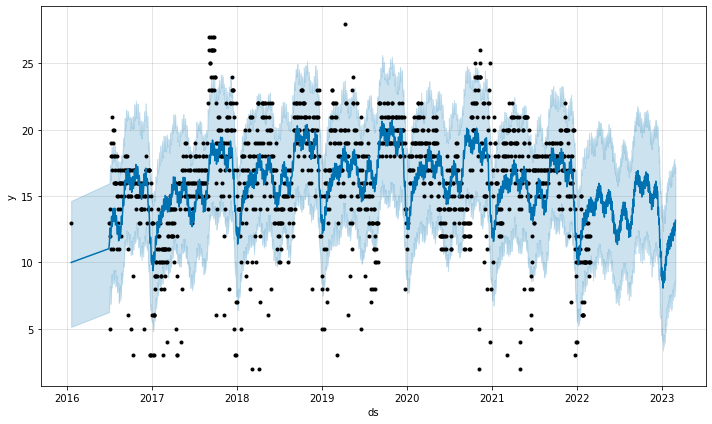

In [12]:
# afisam prognoza
fig1 = m.plot(forecast)
plt.savefig("grafic.png")

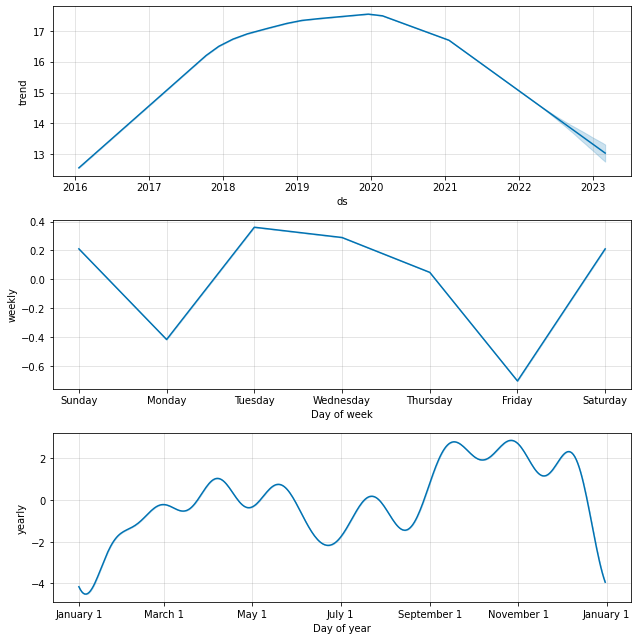

In [13]:
fig2 = m.plot_components(forecast)
plt.savefig("grafic_luni_ani_zile.png")

In [14]:
import pickle

In [15]:
forecast.to_excel('nr_copii_prophet.xlsx')

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-21,12.555304,5.142204,14.635241,12.555304,12.555304,-2.557212,-2.557212,-2.557212,0.048418,0.048418,0.048418,-2.605630,-2.605630,-2.605630,0.0,0.0,0.0,9.998092
1,2016-07-01,13.497987,6.245732,15.947061,13.497987,13.497987,-2.462393,-2.462393,-2.462393,-0.704849,-0.704849,-0.704849,-1.757544,-1.757544,-1.757544,0.0,0.0,0.0,11.035594
2,2016-07-04,13.515444,7.155705,16.068158,13.515444,13.515444,-1.870761,-1.870761,-1.870761,-0.417371,-0.417371,-0.417371,-1.453389,-1.453389,-1.453389,0.0,0.0,0.0,11.644683
3,2016-07-05,13.521263,8.225709,17.264366,13.521263,13.521263,-0.978279,-0.978279,-0.978279,0.361283,0.361283,0.361283,-1.339562,-1.339562,-1.339562,0.0,0.0,0.0,12.542984
4,2016-07-06,13.527082,8.057394,17.289247,13.527082,13.527082,-0.931245,-0.931245,-0.931245,0.290034,0.290034,0.290034,-1.221279,-1.221279,-1.221279,0.0,0.0,0.0,12.595837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,2023-02-24,13.053186,7.440876,16.755483,12.778946,13.327377,-1.026863,-1.026863,-1.026863,-0.704849,-0.704849,-0.704849,-0.322014,-0.322014,-0.322014,0.0,0.0,0.0,12.026324
1834,2023-02-25,13.048431,8.560754,17.309693,12.773286,13.323846,-0.072426,-0.072426,-0.072426,0.211242,0.211242,0.211242,-0.283668,-0.283668,-0.283668,0.0,0.0,0.0,12.976006
1835,2023-02-26,13.043677,8.645983,17.451886,12.767392,13.319733,-0.042431,-0.042431,-0.042431,0.211242,0.211242,0.211242,-0.253673,-0.253673,-0.253673,0.0,0.0,0.0,13.001245
1836,2023-02-27,13.038922,7.824265,17.120349,12.761595,13.315590,-0.649798,-0.649798,-0.649798,-0.417371,-0.417371,-0.417371,-0.232427,-0.232427,-0.232427,0.0,0.0,0.0,12.389123
